# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=11BquVVgQTebvVO5NZ2TGA526rulbWBv5"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Analyzing Customer Sentiment
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1HfZvPCWAwKoYl1qogYlxD_CIZYxYw0aI)

![alt text](https://drive.google.com/uc?id=1XGc89Cxi0ooFQIc6o041cz8-qwXg7l3g)

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/lab 4/

/content/drive/MyDrive/lab 4


In [5]:
!pwd

/content/drive/MyDrive/lab 4


In [6]:
data = pd.read_csv("amazon_alexa.tsv", sep = '\t')

In [7]:
data.tail(10)

,rating,date,variation,verified_reviews,feedback
3140,4,30-Jul-18,White Dot,Barry,1
3141,3,30-Jul-18,Black Dot,,1
3142,4,30-Jul-18,White Dot,My three year old loves it. Good for doing ba...,1
3143,5,30-Jul-18,Black Dot,Awesome device wish I bought one ages ago.,1
3144,5,30-Jul-18,Black Dot,love it,1
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


# TASK #3: EXPLORE DATASET

In [8]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [10]:
data.shape

(3150, 5)

Data has 5 attributes and 3150 rows.

In [11]:
for column in data.columns:
    num_unique_values = data[column].nunique()
    print(f"Số lượng unique value của thuộc tính {column}: {num_unique_values}")

Số lượng unique value của thuộc tính rating: 5
Số lượng unique value của thuộc tính date: 77
Số lượng unique value của thuộc tính variation: 16
Số lượng unique value của thuộc tính verified_reviews: 2301
Số lượng unique value của thuộc tính feedback: 2


### Visualization

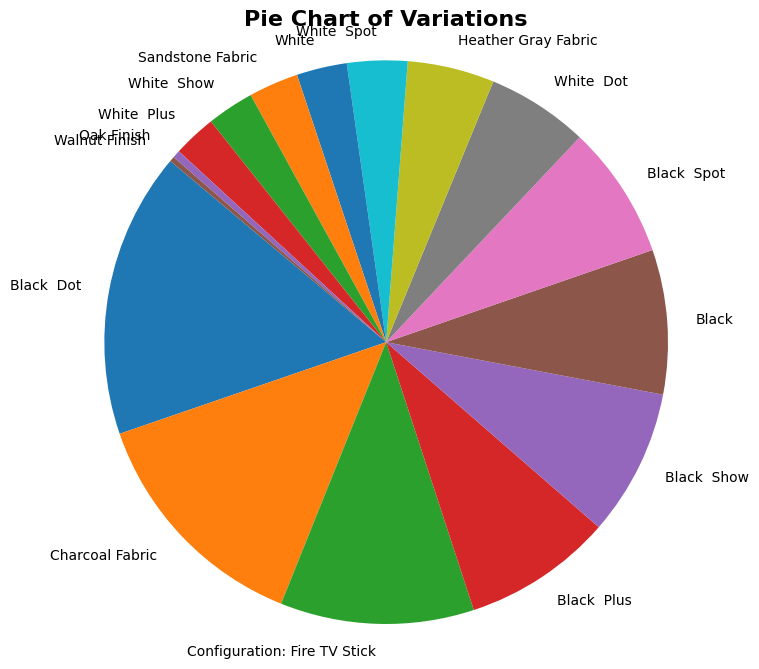

In [12]:
# So sánh số lượng varation
variation_counts = data['variation'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(variation_counts, labels=variation_counts.index, startangle=140)
plt.axis('equal')
plt.title('Pie Chart of Variations', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.show()

Có thể thấy Black Dot được đánh giá nhiều nhất.

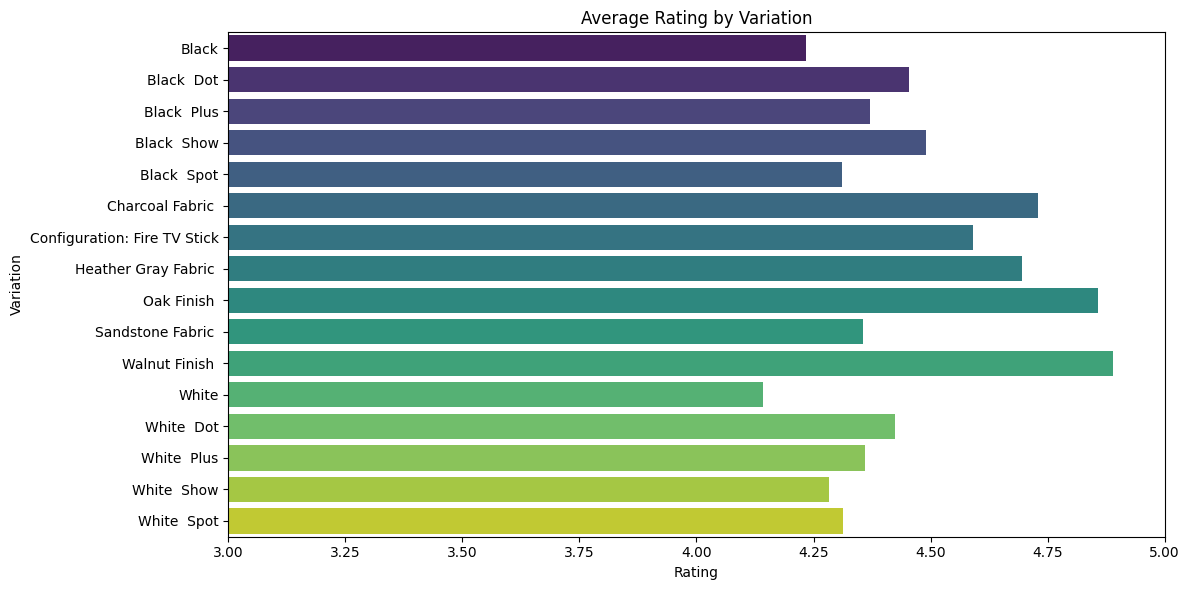

In [13]:
# So sánh số điểm giữa các variation
grouped = data.groupby('variation')['rating'].mean()

variations = grouped.index
ratings = grouped.values

df = pd.DataFrame({'Variation': variations, 'Rating': ratings})

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Rating', y='Variation', palette='viridis')

plt.xlim(3, 5)

plt.xlabel('Rating')
plt.ylabel('Variation')
plt.title('Average Rating by Variation')
plt.tight_layout()
plt.show()

Có thể thấy Walnut Finish được đánh giá cao nhất trong các variation.

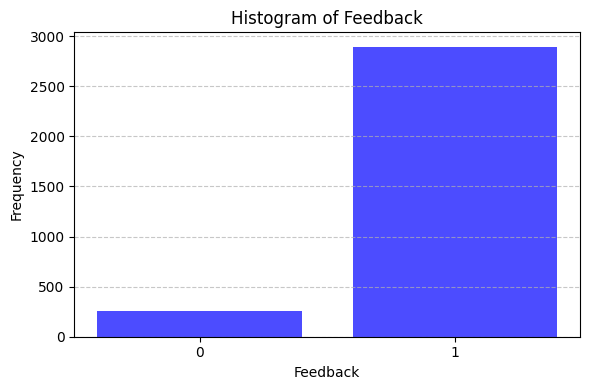

In [14]:
# So sánh mức độ hài lòng của khách hàng
feedback_counts = data['feedback'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(feedback_counts.index, feedback_counts.values, color='blue', alpha=0.7)

plt.xlabel('Feedback')
plt.ylabel('Frequency')
plt.title('Histogram of Feedback')
plt.xticks(feedback_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Có thể thấy chỉ số hài lòng của khách hàng là rất nhiều và vượt xa số lượng không hài lòng.

<ipython-input-33-6b08e91b6ca5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


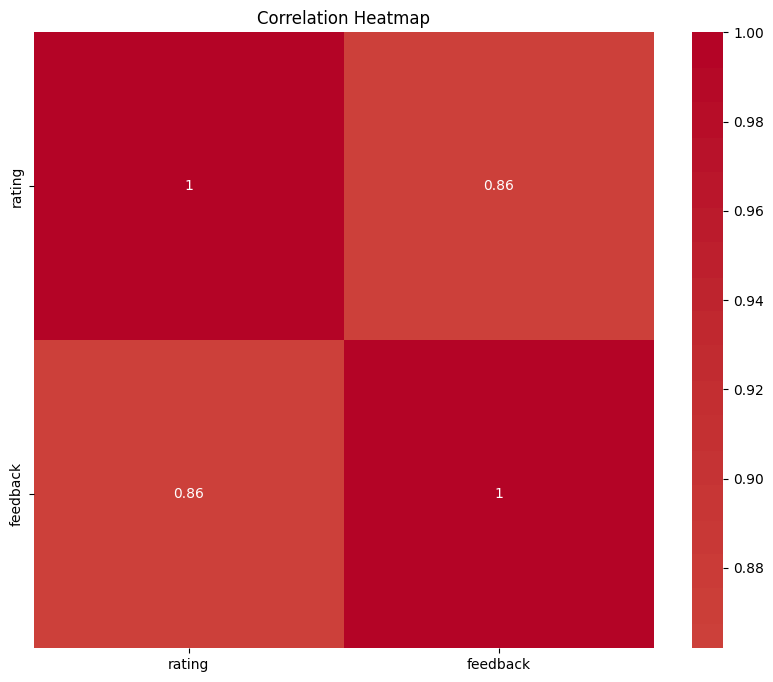

In [33]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

Có thể thấy độ hài lòng của khách hàng phụ thuộc chặt chẽ vào điểm đánh giá "rating".

# TASK #4: PERFORM DATA CLEANING

In [16]:
# Missing value
missing_data = data.isnull().sum()
missing_data

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [17]:
# Duplicated value
duplicated_data = data[data.duplicated()]
duplicated_data

,rating,date,variation,verified_reviews,feedback
700,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
701,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
702,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
703,5,30-Jul-18,Heather Gray Fabric,looks great,1
704,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [18]:
no_duplicated_data = data.drop_duplicates(subset=duplicated_data)
no_duplicated_data.shape

(2435, 5)

# TASK #5: LEARN HOW TO REMOVE PUNCTUATION FROM TEXT

In [19]:
import nltk
from nltk.corpus import stopwords
from sklearn.base import BaseEstimator, TransformerMixin
import string

nltk.download('stopwords')
nltk.download('punkt')

translator = str.maketrans('', '', string.punctuation)

class PunctuationRemover(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [text.translate(translator) for text in X]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# TASK 6: UNDERSTAND HOW TO REMOVE STOPWORDS

In [20]:
from nltk.tokenize import word_tokenize

class StopwordRemover(BaseEstimator, TransformerMixin):
    def __init__(self, language='english'):
        self.language = language

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        stop_words = set(stopwords.words(self.language))
        return [' '.join([word for word in word_tokenize(text) if word.lower() not in stop_words]) for text in X]


# TASK 7: UNDERSTAND HOW TO PERFORM COUNT VECTORIZATION (TOKENIZATION)

![alt text](https://drive.google.com/uc?id=1eQi-Gq66e-sNw1ZvGs-zkJg95mCYdFoJ)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

def count_vectorize(corpus):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(corpus)
    return X.toarray(), vectorizer.get_feature_names_out()

# TASK #8: PERFORM DATA CLEANING BY APPLYING EVERYTHING WE LEARNED SO FAR!

In [22]:
# Let's define a pipeline to clean up all the messages
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('punctuation_remover', PunctuationRemover()),
    ('stopword_remover', StopwordRemover())
])

In [23]:
# Let's test the newly added function
cleaned_messages = pipeline.transform(no_duplicated_data['verified_reviews'])

for original, cleaned in zip(no_duplicated_data['verified_reviews'], cleaned_messages):
    print("Original:", original)
    print("Cleaned:", cleaned)
    print()

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Cleaned: love Echo Spot Waking favorite music able completely turn display night bedroom dark skills yet try Easy use

Original: I like how small it is, but I’m still able to see my Ring cameras.
Cleaned: like small ’ still able see Ring cameras

Original: Great for checking in on my son after school when I'm still at work.  Love getting the weather and traffic in the morning so I can plan my route accordingly
Cleaned: Great checking son school Im still work Love getting weather traffic morning plan route accordingly

Original: Love it!! Super fun! Easy to use! My three year old even gets involved
Cleaned: Love Super fun Easy use three year old even gets involved

Original: I returnef this item because it does not speak Spanish
Cleaned: returnef item speak Spanish

Original:  
Cleaned: 

Original: I am a hardcore fan of Echo. Infact I am in love with all members of my Alexa family. I have Echo, Echo Dot, Echo Plus and now this ne

# TASK #9: UNDERSTAND THE THEORY AND INTUITION BEHIND NAIVE BAYES

![alt text](https://drive.google.com/uc?id=1Xox54bvjhGOhrG-fSxEUIEgw1R3g-RIt)

![alt text](https://drive.google.com/uc?id=18Z4ug4UuyQG79lyPKs1zQwtrP_S4_yoU)

![alt text](https://drive.google.com/uc?id=1sVLtg8GaE3ZhNEZX1WJbxs7KAQyQ5dpX)

![alt text](https://drive.google.com/uc?id=1NT6Fm-lWUWNsu9i8uzVS4Q5pcm5gp8RK)

![alt text](https://drive.google.com/uc?id=1C32q5Uguymr9012x1lzRD5btnvJ-kW9r)

![alt text](https://drive.google.com/uc?id=1g5aXo5E-RIjRBy6-LLLA8gjG2j9dIL5X)

![alt text](https://drive.google.com/uc?id=106OXP_z89Hqh1JYVaROIbst0N0CgFRuT)

![alt text](https://drive.google.com/uc?id=1AXTHZ9KVUsJjMm9Whc4Adi5T4OznsSYn)

# TASK #10: TRAIN A NAIVE BAYES CLASSIFIER MODEL

Nhận thấy điểm đánh giá "rating" và lời nhận xét "verified_reviews" có mối tương quan mạnh mẽ với độ hài lòng của khách hàng "feedback" nên ta sẽ chọn "rating" và "verified_reviews" làm dữ liệu dự đoán và "feedback" làm mục tiêu dự đoán.

In [24]:
vectorization, feature_names = count_vectorize(cleaned_messages)
ratings = no_duplicated_data['rating'].values

# Kết hợp các thông tin vào biến dữ liệu X
X_text = vectorization  # Biến vectorization (mảng các bình luận đã tokenization)
X_rating = ratings.reshape(-1, 1)

X = np.concatenate((X_text, X_rating), axis=1)
y = no_duplicated_data['feedback']  # Cột nhãn (label)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [26]:
y_pred = model.predict(X_test)

# TASK #11: ASSESS TRAINED MODEL PERFORMANCE

![alt text](https://drive.google.com/uc?id=14_ft6Wiu-VaiU_5Ew2nS7EGGr3oLLQf8)

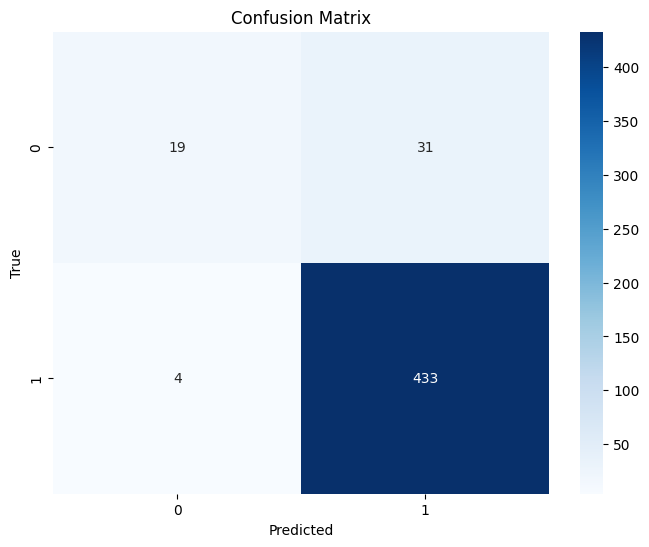

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [28]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.38      0.52        50
           1       0.93      0.99      0.96       437

    accuracy                           0.93       487
   macro avg       0.88      0.69      0.74       487
weighted avg       0.92      0.93      0.92       487



# TASK #12: ASSIGNMENT - TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_pred_lr = model.predict(X_test)

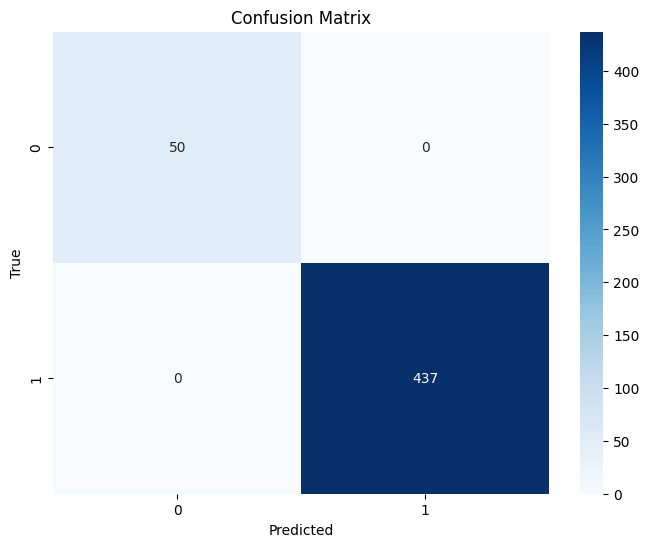

In [31]:
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [32]:
class_report = classification_report(y_test, y_pred_lr)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00       437

    accuracy                           1.00       487
   macro avg       1.00      1.00      1.00       487
weighted avg       1.00      1.00      1.00       487



# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS